In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

Autosaving every 30 seconds


In [2]:
df = pd.read_excel("data63.xlsx")
df

,ResponseId,Country,cond,one,condName,Order,Intervention_order,Belief1,Belief2,Belief3,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
0,R_1d6rdZRmlD02sFi,Usa,11,1,FutureSelfCont,Policy,PolicySocialM,100.0,100.0,100.0,...,2.0,1.0,"2,3,4,6,7",7.0,81.0,25.566,1043.866,8,100.00,100.000000
1,R_1CjFxfgjU1coLqp,Usa,1,1,Control,Policy,PolicySocialM,100.0,100.0,100.0,...,4.0,NaN,"1,3,4,5,6,7",9.0,96.0,16.697,367.657,1,100.00,100.000000
2,R_qxty9a2HTTEq7Xb,Usa,1,1,Control,Policy,PolicySocialM,3.0,78.0,3.0,...,3.0,5.0,"2,3,4,5,6,7",6.0,76.0,24.055,79.902,8,30.25,66.444444
3,R_1ONRMXgQ310zjNm,Usa,12,1,BindingMoral,Policy,PolicySocialM,6.0,5.0,3.0,...,2.0,6.0,"2,3,4,5,6,7",6.0,22.0,11.647,2.701,8,4.50,16.000000
4,R_2VQr7rPu2yI8TnK,Usa,5,1,CollectAction,Policy,PolicySocialM,86.0,65.0,66.0,...,4.0,6.0,"1,2,3,4,5,6,7",10.0,76.0,26.658,398.695,2,71.75,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_1lyi688Kk094oLm,Vietnam,5,1,CollectAction,Policy,SocialMPolicy,98.0,100.0,99.0,...,3.0,NaN,5,4.0,90.0,10.131,74.142,6,99.25,100.000000
59436,R_1rkbbHRlgDFMXEJ,Vietnam,6,1,SystemJust,Policy,SocialMPolicy,100.0,99.0,98.0,...,3.0,5.0,"1,2,3,4,5,6,7",7.0,71.0,6.253,35.904,8,99.25,82.888889
59437,R_32Ko4BHFhcFWnQ1,Vietnam,3,1,NegativeEmotions,Policy,SocialMPolicy,28.0,99.0,77.0,...,3.0,3.0,"2,4,5,6,7",7.0,51.0,7.583,442.681,2,63.00,72.333333
59438,R_3rMtHx4LOa81P3T,Vietnam,4,1,SciConsens,Policy,SocialMPolicy,100.0,100.0,100.0,...,3.0,1.0,"1,2,4,5,6,7",6.0,100.0,12.301,8.746,8,100.00,89.888889


In [3]:
df_US = df.query("Country=='usa'")
dfc = df.query("cond==1")

In [4]:
dfc

,ResponseId,Country,cond,one,condName,Order,Intervention_order,Belief1,Belief2,Belief3,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
1,R_1CjFxfgjU1coLqp,Usa,1,1,Control,Policy,PolicySocialM,100.0,100.0,100.0,...,4.0,NaN,"1,3,4,5,6,7",9.0,96.0,16.697,367.657,1,100.00,100.000000
2,R_qxty9a2HTTEq7Xb,Usa,1,1,Control,Policy,PolicySocialM,3.0,78.0,3.0,...,3.0,5.0,"2,3,4,5,6,7",6.0,76.0,24.055,79.902,8,30.25,66.444444
17,R_AjQsPrpTA07lwbf,Usa,1,1,Control,Policy,PolicySocialM,95.0,74.0,72.0,...,2.0,5.0,"1,2,3,4,5,6,7",6.0,70.0,23.331,514.694,8,82.25,84.142857
24,R_ZqaUaJxrm1YPuVP,Usa,1,1,Control,Policy,PolicySocialM,100.0,100.0,100.0,...,4.0,8.0,"1,2,3,4,6,7",10.0,100.0,4.922,55.954,8,100.00,100.000000
30,R_2rA8FrYQhsZt1oq,Usa,1,1,Control,Policy,PolicySocialM,52.0,96.0,100.0,...,2.0,3.0,"1,2,3,4,5,6,7",5.0,65.0,42.200,328.506,1,87.00,60.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59382,R_32QpwhpDAbtNRWJ,Vietnam,1,1,Control,Policy,SocialMPolicy,100.0,100.0,95.0,...,3.0,1.0,"1,2,4,5,6,7",5.0,79.0,19.212,206.363,8,98.75,47.333333
59393,R_2aX3rZiymHXU8jU,Vietnam,1,1,Control,Policy,SocialMPolicy,100.0,100.0,85.0,...,3.0,NaN,"1,2,4,5,6,7",6.0,74.0,22.001,265.488,5,96.25,62.888889
59394,R_3nGVMjBBULHfMYI,Vietnam,1,1,Control,Policy,SocialMPolicy,95.0,93.0,100.0,...,3.0,3.0,"1,2,4,5,6,7",7.0,66.0,11.000,219.370,8,94.50,90.111111
59415,R_Rqom9DZcYCveM49,Vietnam,1,1,Control,Policy,SocialMPolicy,70.0,67.0,55.0,...,3.0,1.0,"1,2,4,6",5.0,50.0,4.965,35.502,3,62.50,71.800000


In [5]:
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
cmap = [
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
]

<IPython.core.display.Javascript object>


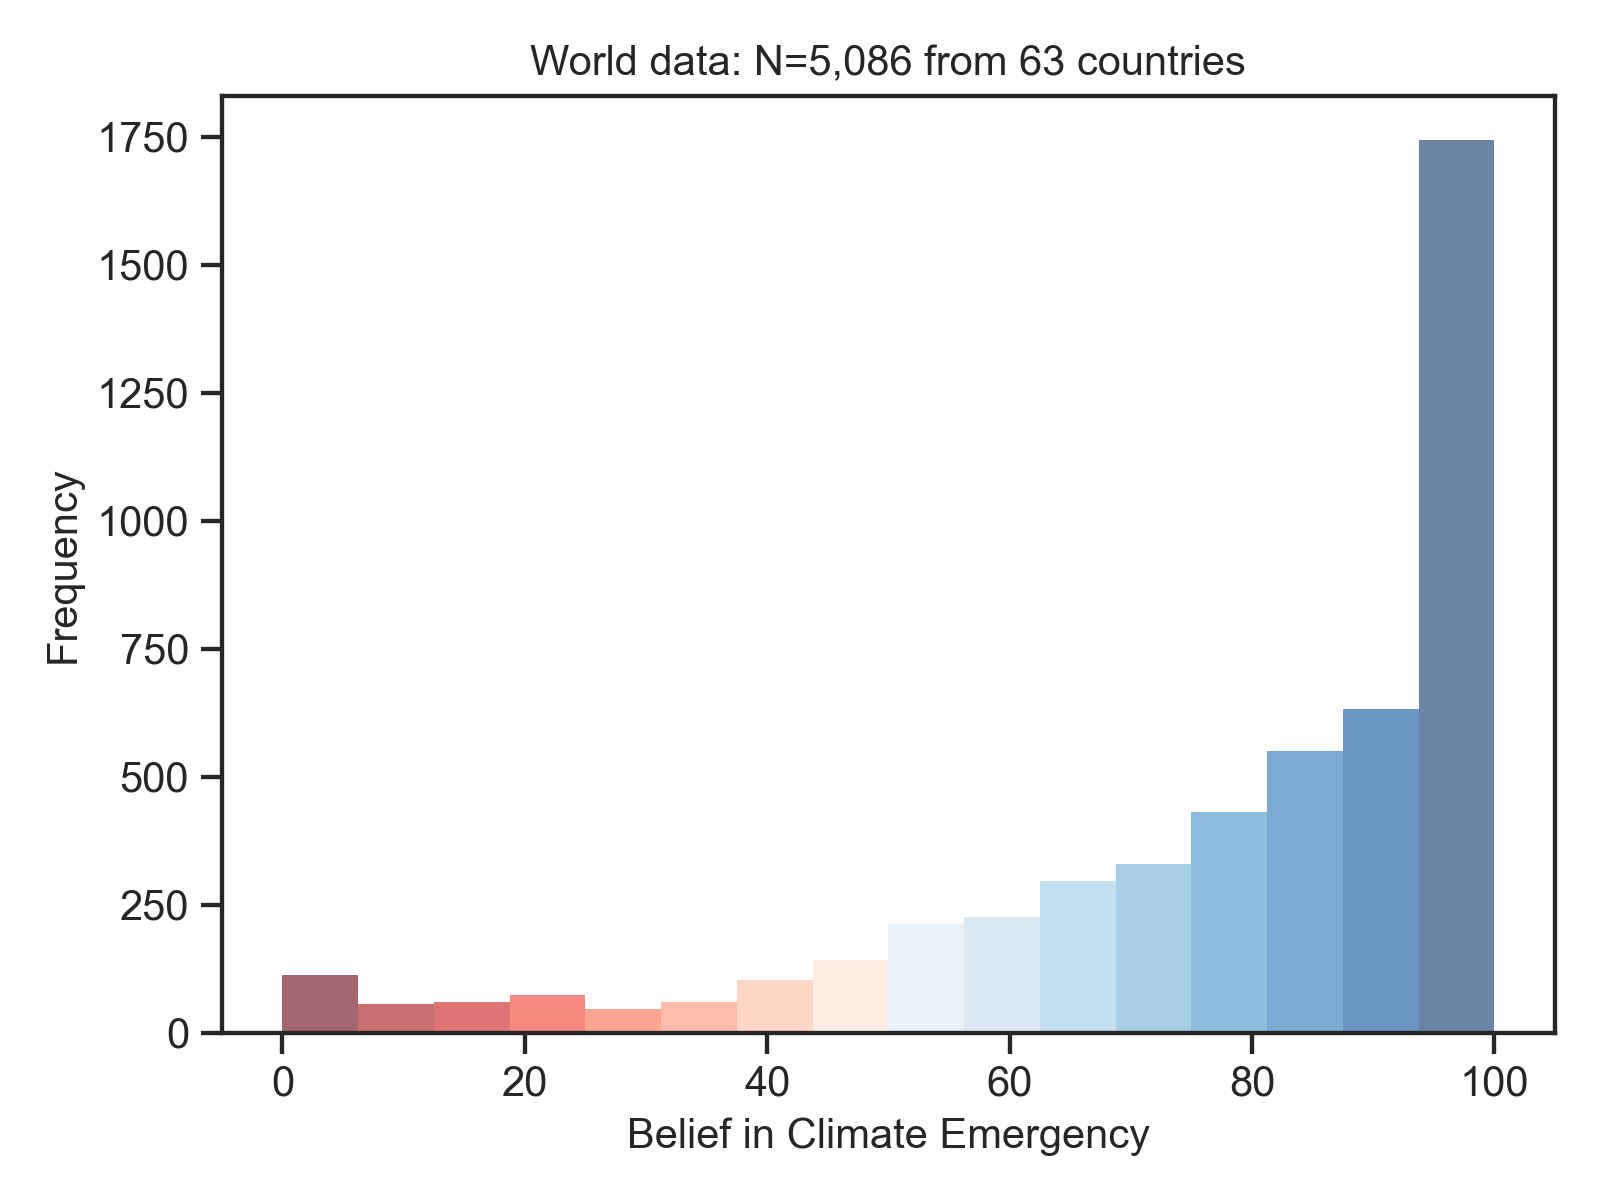

In [23]:
ct, edges = np.histogram(dfc.BELIEFcc.dropna(), bins=16)
fig, ax = plt.subplots(1, 1)
plt.bar(edges[:-1], ct, width=100/16, color=list(reversed(cmap)), 
    alpha=0.6, align='edge', linewidth=0)
plt.xlabel("Belief in Climate Emergency")
plt.ylabel("Frequency")
plt.title("World data: N=5,086 from 63 countries")
plt.tight_layout()
plt.savefig('belief_c.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


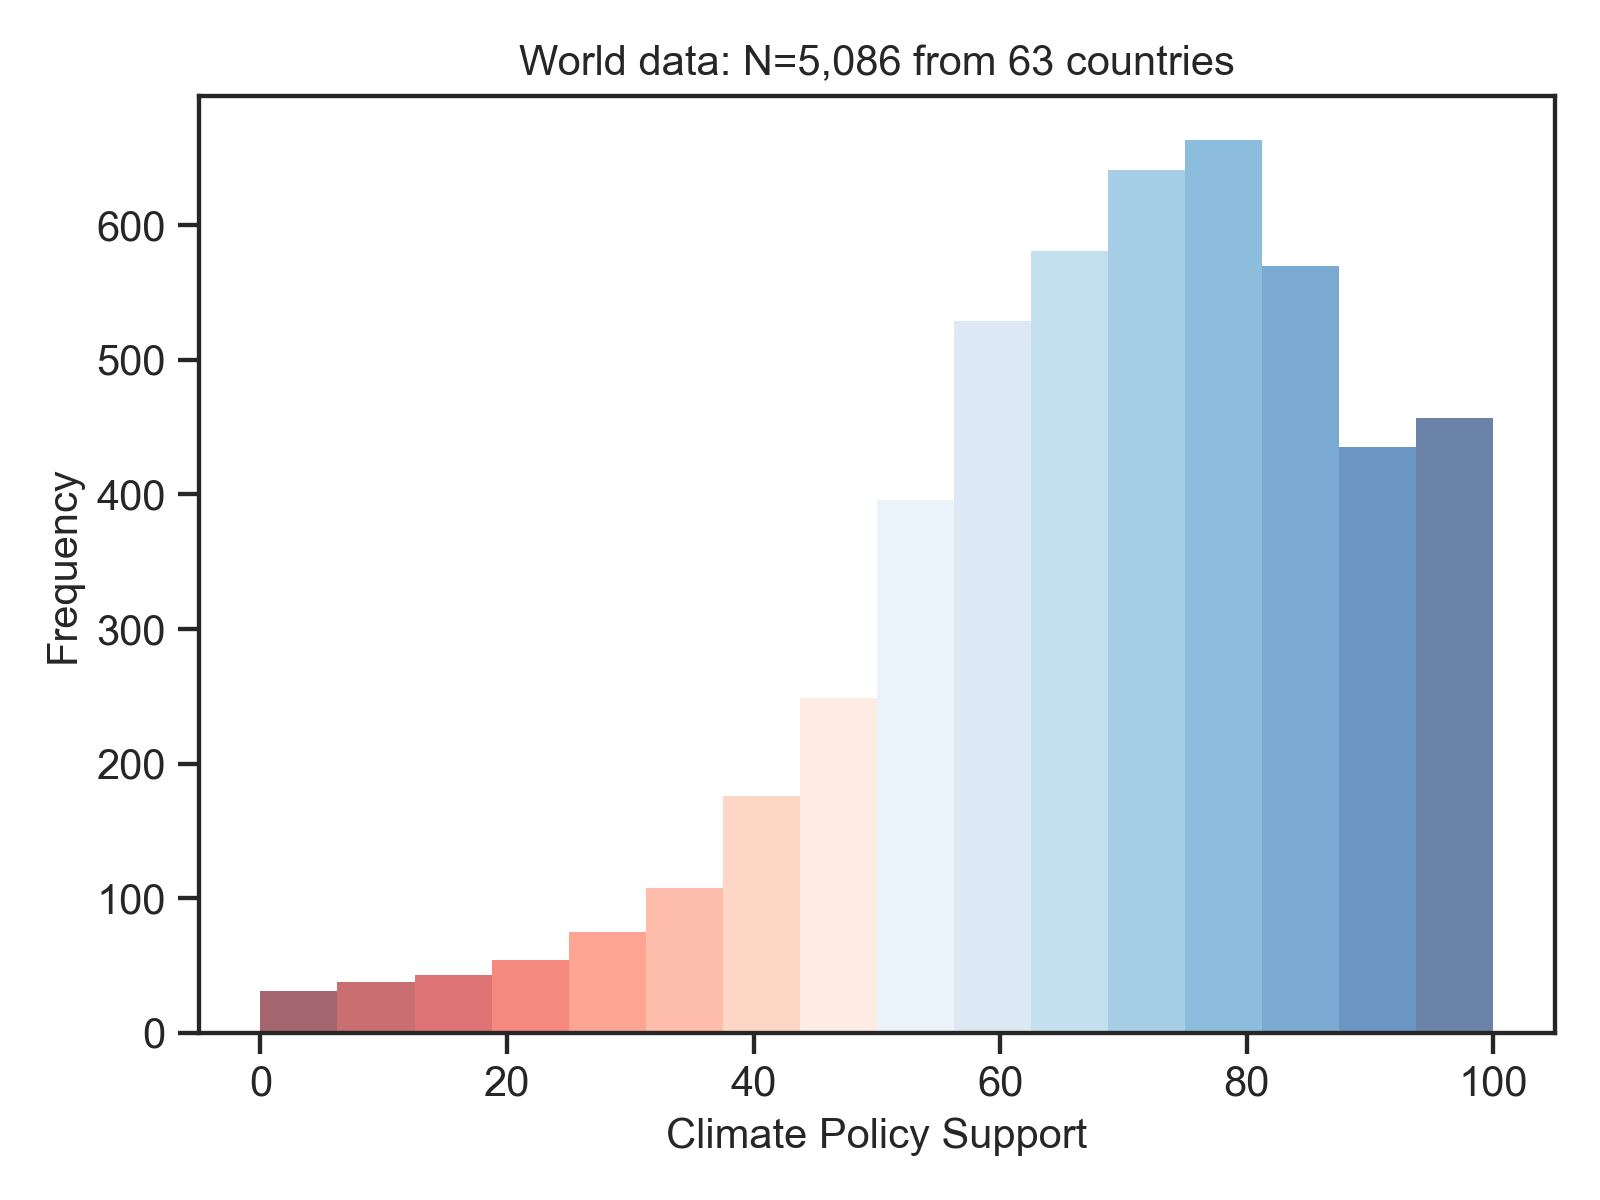

In [24]:
ct, edges = np.histogram(dfc.POLICYcc.dropna(), bins=16)
fig, ax = plt.subplots(1, 1)
plt.bar(edges[:-1], ct, width=100/16, color=list(reversed(cmap)), 
    alpha=0.6, align='edge', linewidth=0)
plt.xlabel("Climate Policy Support")
plt.ylabel("Frequency")

plt.title("World data: N=5,086 from 63 countries")
plt.tight_layout()
plt.savefig('policy_c.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


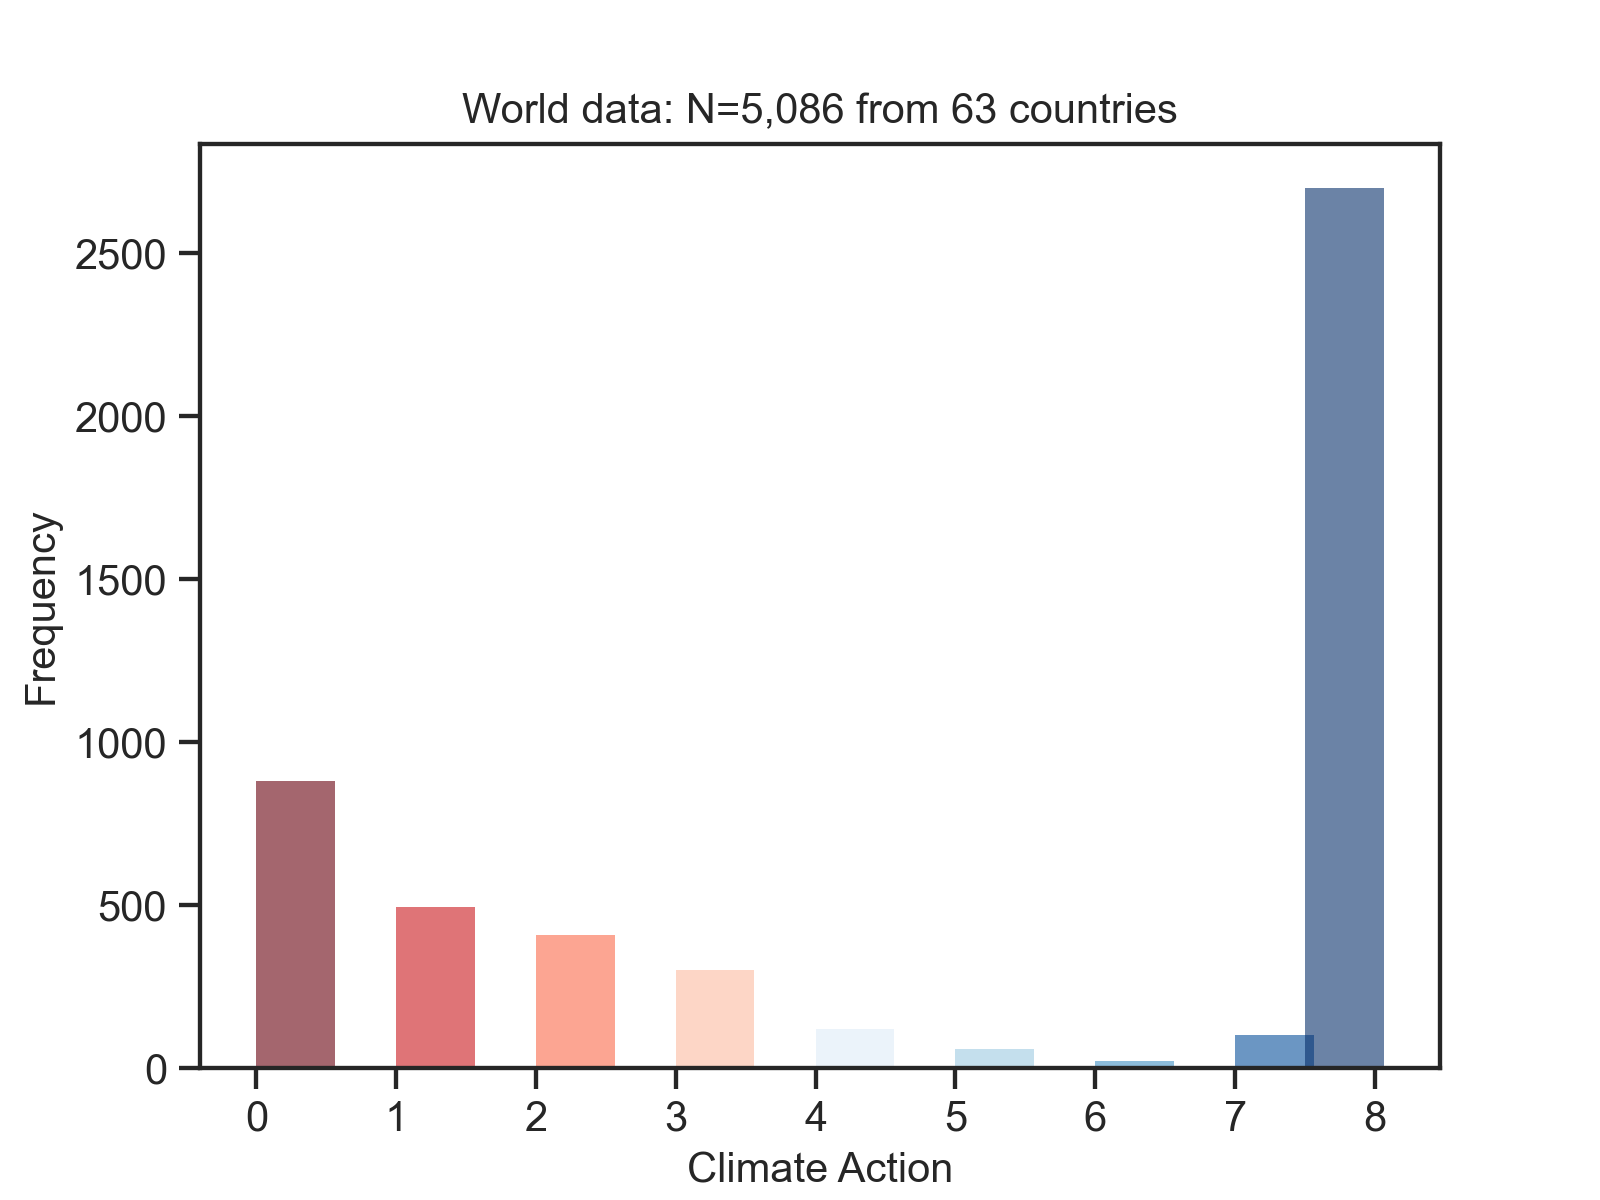

In [25]:
ct, edges = np.histogram(dfc.WEPTcc.dropna(), bins=16)
fig, ax = plt.subplots(1, 1)
plt.bar(edges[:-1], ct, width=9/16, color=list(reversed(cmap)), 
    alpha=0.6, align='edge', linewidth=0)
plt.xlabel("Climate Action")
plt.ylabel("Frequency")
plt.title("World data: N=5,086 from 63 countries")
plt.savefig('wept_c.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


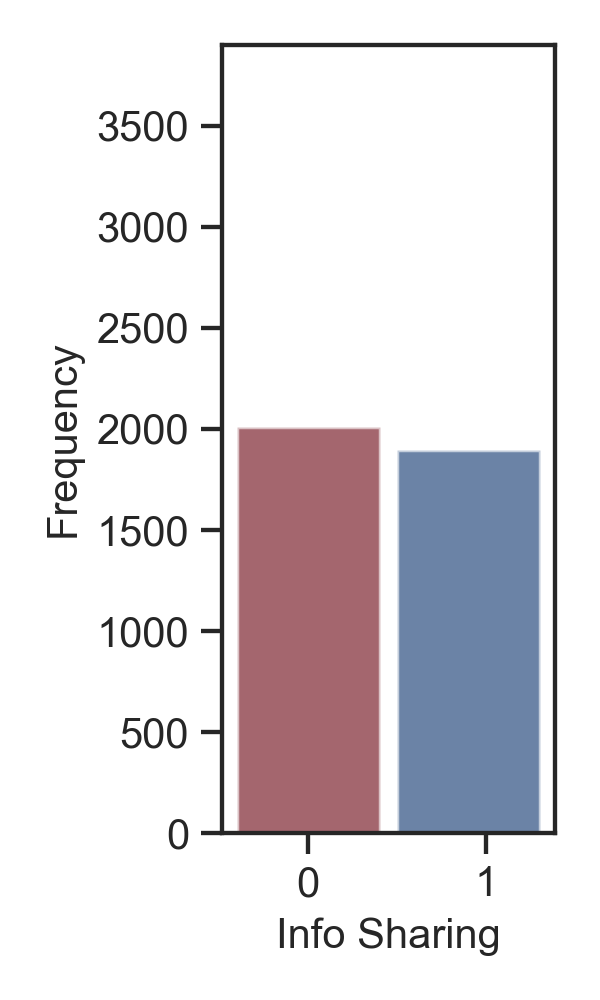

In [26]:
colorss = ['#08306b', '#67000d']

ct, edges = np.histogram(dfc.SHAREcc.dropna())
fig, ax = plt.subplots(1, 1, figsize=(2.4,4))
plt.bar(edges[:-1], ct, color=list(reversed(colorss)), alpha=0.6)
plt.xlabel("Info Sharing")
plt.ylabel("Frequency")
plt.ylim(0,3900)
plt.tight_layout()
plt.savefig('share_c.pdf', dpi=900, format="pdf")